In [1]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

  Using cached labelme-5.4.1-py3-none-any.whl
  Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached albumentations-1.4.6-py3-none-any.whl.metadata (37 kB)
  Using cached imgviz-1.7.5-py3-none-any.whl
  Using cached tensorflow_intel-2.16.1-cp310-cp310-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.16.1-cp310-cp310-win_amd64.whl (376.9 MB)
Using cached albumentations-1.4.6-py3-none-any.whl (153 kB)


In [18]:
import os
import time
import uuid
import cv2

In [6]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [9]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!labelme

In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [6]:

images.as_numpy_iterator().next()

b'data\\images\\d01009bc-0c9b-11ef-b433-b48c9d8e2f8c.jpg'

In [7]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [8]:
images = images.map(load_image)

In [9]:

images.as_numpy_iterator().next()

array([[[254, 255, 243],
        [254, 255, 243],
        [253, 255, 244],
        ...,
        [199, 200, 192],
        [201, 202, 194],
        [202, 203, 195]],

       [[253, 255, 242],
        [253, 255, 242],
        [253, 255, 244],
        ...,
        [199, 200, 192],
        [199, 200, 192],
        [200, 201, 193]],

       [[253, 255, 242],
        [253, 255, 242],
        [253, 255, 244],
        ...,
        [199, 200, 192],
        [199, 200, 192],
        [199, 200, 192]],

       ...,

       [[223, 225, 214],
        [224, 226, 215],
        [224, 226, 215],
        ...,
        [152, 152, 142],
        [152, 152, 142],
        [152, 152, 142]],

       [[221, 222, 214],
        [222, 223, 215],
        [223, 224, 216],
        ...,
        [152, 152, 144],
        [152, 152, 144],
        [152, 152, 144]],

       [[220, 221, 213],
        [221, 222, 214],
        [222, 223, 215],
        ...,
        [152, 152, 144],
        [152, 152, 144],
        [152, 152, 144]]

In [10]:

type(images)

tensorflow.python.data.ops.map_op._MapDataset

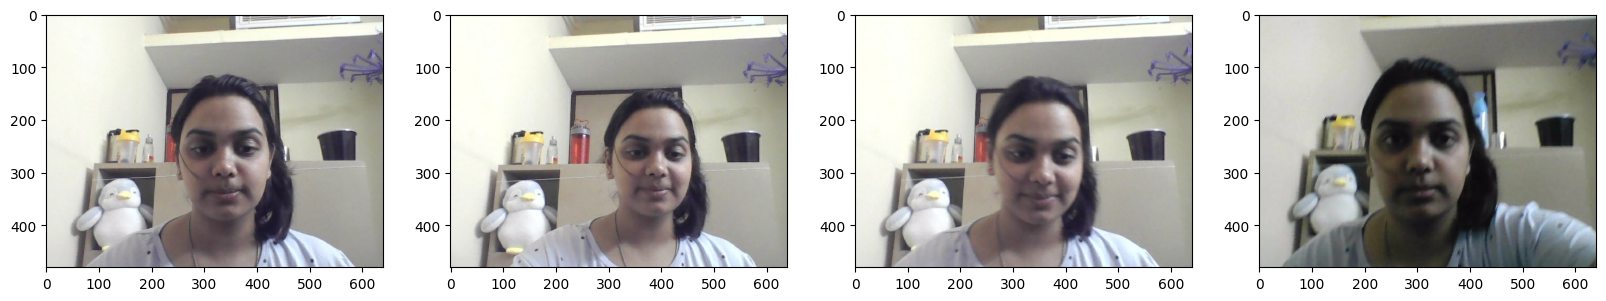

In [11]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [20]:
90*.7 # 63 to train
90*.15 # 14 and 13 to test and val

13.5

In [2]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data\\train\\images'